# Lab 2 - The Discrete Fourier Transform

Instructor: Prof. Lillian Jane Ratliff

Teaching Assistants: Ashwin Srinivas Badrinath and Kevin Lin

Team Members: Peter Michael and Guo Zhenghao

In [2]:
import numpy as np
import math
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

## 1) Complex Numbers and Complex Sinusoids

In [3]:
# writing the complex number as real + imaginary
z1 = 4+3j

# using the function complex
z2 = 5+7j   
z3 = 7+5j
print(z1)
print(z2)
print(z3)

# add the real part of 4+3j and the imaginary part of 
# 5+7j and display the result
print(np.real(z1)+np.imag(z2))

# subtract the imaginary part of 4+3j from the real part of
# 5+7j and display the result
print(np.real(z2)-np.imag(z1))

# multiply 4+3j and 4-3j and dislay the result
print(z1 * np.conj(z1))

# divide 7+5j and 7-5j and display the result
print(z3/np.conj(z3))

(4+3j)
(5+7j)
(7+5j)
11.0
2.0
(25+0j)
(0.32432432432432434+0.945945945945946j)


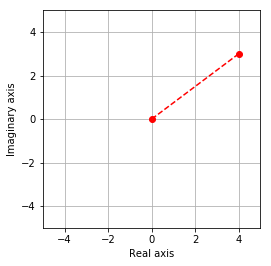

In [4]:
# define a complex number
z = 4+3j

# obtain the real and imaginary parts of the complex number
real = np.real(z)
imaginary = np.imag(z)

# plot the complex number on the complex plane
plt.plot((0,real),(0,imaginary),'ro--')

# some plotting touch-ups
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

In [5]:
# compute the magnitude of the complex number using 
# Pythagorean theorem
mag1 = np.real(np.sqrt(z*np.conj(z)))
# or using abs
mag2 = np.abs(z) 
# print out the magnitude of the complex number
print( 'The magnitude is',mag1,'or', mag2)

# compute the angle of the complex number using trigonometry
phs1 = np.arctan(np.imag(z)/np.real(z)) 
# or using the angle function
phs2 = np.angle(z)
# print out the phase of the complex number
print( 'The angle is', phs2,'or',phs1 )

The magnitude is 5.0 or 5.0
The angle is 0.6435011087932844 or 0.6435011087932844


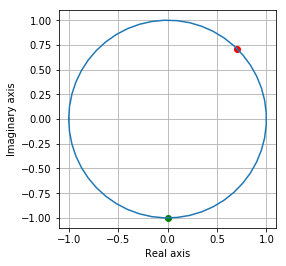

In [6]:
# define k (possibly an array of angles)
k = np.array([np.pi/4, -np.pi/2])

# Define the complex exponential here using Euler's formula
# (possibly with a lambda expression)

euler = lambda x: np.exp(x*np.complex('j'))

# plot dot
eulerK = euler(k)
plt.plot(np.real(eulerK[0]),np.imag(eulerK[0]),'ro')
plt.plot(np.real(eulerK[1]),np.imag(eulerK[1]),'go')

# draw unit circle for reference
n = euler(np.linspace(-np.pi, np.pi))
plt.plot(np.real(n), np.imag(n))

# some plotting touch-ups
#plt.plot((0,),(0,imaginary),'ro--')
plt.axis('square')
plt.grid(True)
plt.xlabel('Real axis'), 
plt.ylabel('Imaginary axis')
plt.show()

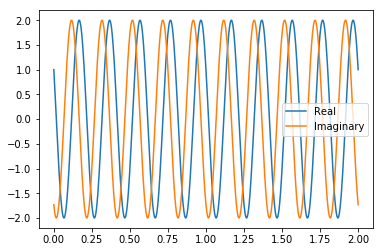

In [7]:
# complex sine waves

# general simulation parameters
srate = 500 # sampling rate in Hz
time  = 2 # time in seconds

# sine wave parameters
freq = 5    # frequency in Hz
ampl = 2    # amplitude in a.u.
phase = np.pi/3  # phase in radians

# generate the sine wave
n = np.arange(0,time+1/(2*srate), 1/srate)
csw = ampl*euler(-(2*np.pi*freq*n + phase))

# plot the results
plt.plot(n, np.real(csw), label='Real')
plt.plot(n,np.imag(csw), label='Imaginary')
plt.legend()
plt.show()

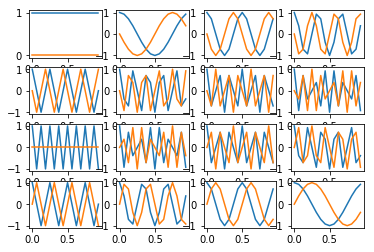

In [8]:
points = 16 # number of time points , sometimes denoted by N

# time vector to plot the basis
FourierTime = np.array(range(0,points))/points 

# the slowest frequency in an N point sinusoid in Hz
slowest = 0
# the fastest frequency in an N point sinusoid in Hz
fastest = points

for fi in range(slowest,fastest):
    # create complex sine wave
    csw = euler(-(2*np.pi*fi*FourierTime))
    
    # and plot it
    loc = np.unravel_index(fi,[4, 4],'F')
    plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.plot(FourierTime,np.real(csw))
    plt.plot(FourierTime,np.imag(csw))

plt.show()

## 2) Naive Computation of the DFT and IDFT from First Principles (Vector Form)

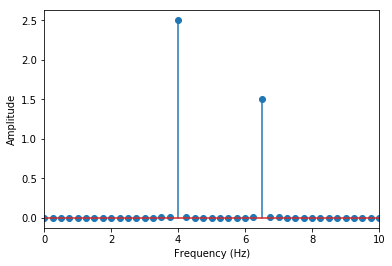

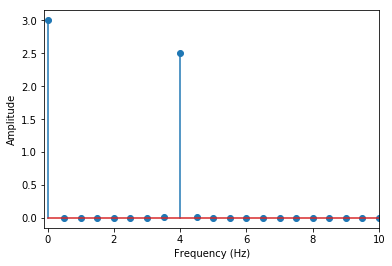

In [17]:
## The DFT in loop-form

fs = 1000
n1 = np.arange(0,4+1/(2*fs), 1/fs)
n2 = np.arange(0,2+1/(2*fs), 1/fs)

pnts1 = len(n1)
pnts2 = len(n2)

# create the signal 1
signal1 = 2.5*np.cos(2*np.pi*4*n1) + 1.5*np.cos(2*np.pi*6.5*n1)

# create the signal 2
signal2 = 2.5*np.cos(2*np.pi*4*n2) + 1.5

# prepare the Fourier transform for signal 1
fourTime1 = np.array(range(0,pnts1))/pnts1
fCoefs1  = np.zeros((len(signal1)),dtype=complex) 

# prepare the Fourier transform for signal 2
fourTime2 = np.array(range(0,pnts2))/pnts2
fCoefs2   = np.zeros(len(signal2),dtype=complex)

for fi in range(0,pnts1):
    
    # create complex sine wave
    csw1 = euler(-(fi*2*np.pi*fourTime1))
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs1[fi] = (1/pnts1) * np.dot(signal1, csw1)
    

for fi in range(0,pnts2):
    # create complex sine wave and compute dot product with signal
    csw2 = euler(-(fi*((2*np.pi))*fourTime2))
    
    fCoefs2[fi] = (1/pnts2) * np.dot(signal2, csw2)


# extract amplitudes for the spectrum of signal 1
ampls1 = 2*np.abs(fCoefs1)

# extract amplitudes for the spectrum of signal 2
ampls2 = 2*np.abs(fCoefs2);


# compute frequencies vector for the spectrum of signal 1
hz1 = np.linspace(0,fs/2,num=math.floor(pnts1/2.)+1)

# compute frequencies vector for the spectrum of signal 2
hz2 = np.linspace(0,fs/2,num=math.floor(pnts2/2.)+1)

fig1 = plt.figure(1)
plt.stem(hz1,ampls1[range(0,len(hz1))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.xlim(0,10)

fig2 = plt.figure(2)
plt.stem(hz2,ampls2[0:len(hz2)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.show()

C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


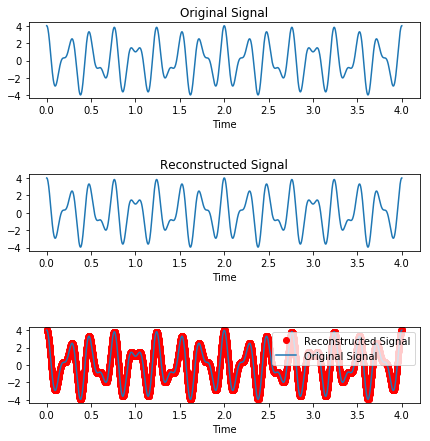

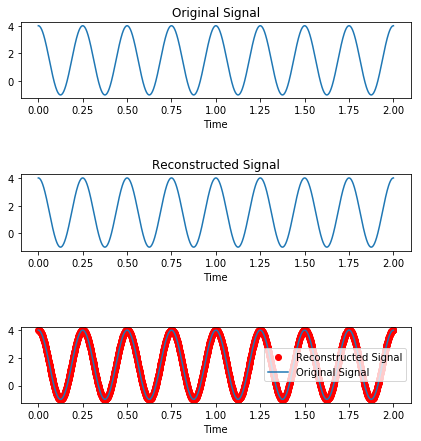

In [22]:
# IDFT (vector)

# initialize time-domain reconstruction for signal 1
reconSignal1 = np.zeros(len(signal1))
# initialize time-domain reconstruction for signal 2
reconSignal2 = np.zeros(len(signal2))

for fi in range(0,pnts1):
    
    # create coefficient-modulated complex sine wave
    inv_csw1 = euler(fi*2*np.pi*fourTime1)
    
    # sum them together
    reconSignal1[fi] = np.dot(fCoefs1, inv_csw1)
    
for fi in range(0,pnts2):
    
    # create coefficient-modulated complex sine wave
    inv_csw2 = euler(fi*2*np.pi*fourTime2)
    
    # sum them together
    reconSignal2[fi] = np.dot(fCoefs2, inv_csw2)

#plot the results for signal 1
fig = plt.figure(3, figsize=(7,7))
plt.subplots_adjust(hspace=1,wspace=0.5)
plt.subplot(3,1,1)
plt.title('Original Signal')
plt.xlabel('Time')
plt.yticks(np.arange(-4,4+0.25, 2))
plt.plot(n1, signal1)

plt.subplot(3,1,2)
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.yticks(np.arange(-4,4+0.25, 2))
plt.plot(n1, reconSignal1)

plt.subplot(3,1,3)
plt.plot(n1, reconSignal1,'ro', label='Reconstructed Signal')
plt.plot(n1, signal1, label='Original Signal')
plt.xlabel('Time')
plt.yticks(np.arange(-4,4+0.25, 2))
plt.legend()
plt.show()

#plot the results for signal 2
fig2 = plt.figure(4, figsize=(7,7))
plt.subplots_adjust(hspace=1,wspace=0.5)
plt.subplot(3,1,1)
plt.title('Original Signal')
plt.xlabel('Time')
#plt.yticks(np.arange(-4,4+0.25, 2))
plt.plot(n2, signal2)

plt.subplot(3,1,2)
plt.title('Reconstructed Signal')
plt.xlabel('Time')
#plt.yticks(np.arange(-4,4+0.25, 2))
plt.plot(n2, reconSignal2)

plt.subplot(3,1,3)
plt.plot(n2, reconSignal2,'ro', label='Reconstructed Signal')
plt.plot(n2, signal2, label='Original Signal')
plt.xlabel('Time')
#plt.yticks(np.arange(-4,4+0.25, 2))
plt.legend()
plt.show()

## 3) Naive Computation of the DFT and IDFT from First Principles (Matrix Form)

In [95]:
def dft_matrix(N):
    # create a 1xN matrix containing indices 0 to N-1
    w = np.arange(0,N)
    # take advantage of numpy broadcasting to create the matrix
    W = euler((-2*np.pi/N)*np.outer(w.T, w))
    ## OR
    
    # use a nested for loop to populate an NxN matrix
    
    return W

In [96]:
def dft(signal,N):
    
    # Obtain DFT matrix for signal 
    W = dft_matrix(N)
    # Find the DFT for signal
    X = (1/N) * np.dot(W, signal)
    # return the DFT
    
    return X

In [97]:
def dft_shift(X):
    N = int(len(X))
    if N % 2 == 0:
        # even-length: return N+1 values
        n_range = int(N//2)
         # specify the range of frequency bins in the DFT
        n = np.arange(-N/2, N/2 + 1)
        # create the shifted spectrum
        Y = np.concatenate([X[]])
        return n,Y
    else:
        # odd-length: return N values
        
        # specify the range of frequency bins in the DFT
        n = np.arange(-(N-1)//2, (N-1)//2 + 1)
        # create the shifted spectrum
        n_range = int((N-1)//2)
        Y = np.concatenate([X[n_range:N], X[0:n_range]])
        
        return n,Y

Text(0.5,1,'Shifted Spectrum')

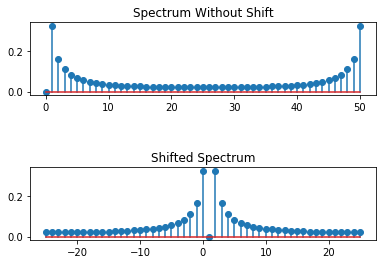

In [98]:
# test your shift function here

x = np.arange(0, 1.02, 0.02) - 0.5 # test signal
X = dft(x,len(x)) # obtain DFT of the test signal

fig_test=plt.figure(100)
fig_test.subplots_adjust(hspace=1, wspace=1, left = 0.1)
# plot the spectrum without shift
plt.subplot(2,1,1)
plt.stem(2*abs(X));
plt.title('Spectrum Without Shift')

n, y = dft_shift(X) # obtain shifted spectrum
# plot the shifted spectrum
plt.subplot(2,1,2)
plt.stem(n, 2*abs(y));
plt.title('Shifted Spectrum')

In [100]:
def dft_map(X, Fs, shift):
    # define the resolution
    resolution = Fs / len(X)
    
    if shift:
        # apply a shift if the condition is True
        
        # get both the frequency bins and the shifted spectrum
        n, Y = dft_shift(X)
    else:
        N = len(X)
        Y = dft(X, N) # retain the original spectrum for no shift
        
        # the range of frequency bins is from 0 to 
        # the length of the signal for no shift
        n = np.arange(0, N)
        
    f =  resolution * n # obtain frequency vector
    
    return f, Y

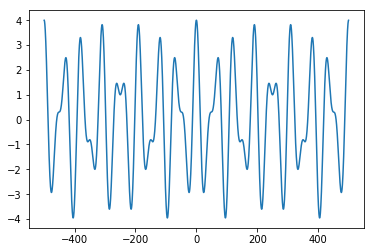

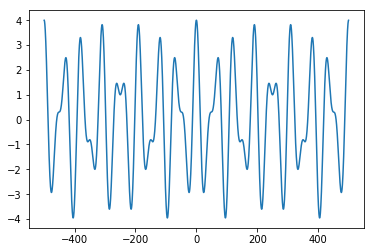

In [108]:
# Find the DFT for signal 1
f1, X1 = dft_map(signal1, fs, True)
# obtain absolute value
absX1 = 2*abs(X1)
# plot the result


# Find the DFT for signal 2
f2, X2 = dft_map(signal1, fs, True)
# obtain absolute value
absX2 = 2*abs(X2)
# plot the result

plt.plot(f1, X1)
plt.show()

plt.plot(f2, X2)
plt.show()

In [ ]:
# IDFT (matrix)

# Obtain the DFT matrix
W1 = 
# inverse DFT fo signal 1
x_hat1 = 
# plot the result


# Obtain the DFT matrix
W2 = 
# inverse DFT for signal 2
x_hat2 = 
# plot the result



## 4) Numerical Precision Issues With the DFT and IDFT

In [ ]:
# define a discrete step function
def u(n):
    return ??

In [ ]:
N = 128 # define the number of points in the discrete time pulse
n =  # discrete time index values
pulse =  # obtain the discrete pulse
# plot the pulse


In [ ]:
P =  # obtain the DFT of the pulse using your DFT function

# plot the magnitude and phase of the pulse's spectrum


In [ ]:
# Obtain the DFT using scipy or numpy's fft function
P =  

# plot the magnitude and phase of the pulse's spectrum


In [ ]:
# Obtain the N point DFT matrix
W = 
# use the IDFT to obtain the reconstructed time-domain signal
x_hat =  

# plot the error (for both, imaginary and real parts) 
# between the original signal and the reconstructed signal


In [ ]:
# use the IDFT function in scipy or numpy
# to obtain the reconstructed time-domain signal
x_hat = 

# plot the error (for both, imaginary and real parts) 
# between the original signal and the reconstructed signal


## 5) Minimizing Energy Spread and Zero Padding

In [ ]:
def minimizeEnergySpreadDFT(x, fs, f1, f2):
    ''''
    Inputs:
    x : signal
    fs : sampling rate
    f1 : frequency of one of the sinusoids
    f2 : frequency of the other sinusoid
    
    Outputs:
    mX : the spectrum of x (with shift if needed) with minimum
    spectral lekage  
    f: the corresponding frequency vector
    ''''

    t1 =  # time period of the discrete time or sampled signal
    t2 =  # time period of the discrete time or sampled signal
    M =  # LCM of the two periods

    X =  # M point FFT of the signal
    
    # obtain the frequency mapping and shifted spectrum
    f,mX =  
    
    return mX,f

In [ ]:
#Define the sampling rate and the signal


# Plot the DFT after minimizing the energy spread or spectral
# leakage



# Plot the DFT before minimizing the energy spread or spectral
# leakage


In [ ]:
def optimalZeropad(x, fs, f):
  
    M =  # store the length of the signal
    
    # calculate the number of zeros to be padded
    period_samples = 
    fraction = 
    pad = 
    
    N =  # find the length of the signal after zero padding
    
    x =  # pad the signal with zeros
    
    X =  # obtain the DFT of the zero padded signal
    
    # obtain the frequency mapping and shifted spectrum
    f,mX =   
    
    return mX,f

In [ ]:
# Define the sampling rate and the signal


# Find DFT without zero padding and plot the result


# Find DFT after zero padding and plot the result
